In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [12]:
import pandas as pd

train = pd.read_csv('./Data/train_df_errno.csv')
test = pd.read_csv('./Data/test_df.csv')
sub = pd.read_csv('./Data/sample_submission.csv')
age = pd.read_csv('./Data/age_gender_info.csv')

train.shape, test.shape, sub.shape, age.shape

((2896, 15), (1008, 14), (150, 2), (16, 23))

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2896 entries, 0 to 2895
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   단지코드        2896 non-null   object 
 1   총세대수        2896 non-null   int64  
 2   임대건물구분      2896 non-null   object 
 3   지역          2896 non-null   object 
 4   공급유형        2896 non-null   object 
 5   전용면적        2896 non-null   float64
 6   전용면적별세대수    2896 non-null   int64  
 7   공가수         2896 non-null   float64
 8   자격유형        2896 non-null   object 
 9   임대보증금       2327 non-null   object 
 10  임대료         2327 non-null   object 
 11  10분내지하철수    2685 non-null   float64
 12  10분내버스정류장수  2892 non-null   float64
 13  단지내주차면수     2896 non-null   float64
 14  등록차량수       2896 non-null   float64
dtypes: float64(6), int64(2), object(7)
memory usage: 339.5+ KB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   단지코드        1008 non-null   object 
 1   총세대수        1008 non-null   int64  
 2   임대건물구분      1008 non-null   object 
 3   지역          1008 non-null   object 
 4   공급유형        1008 non-null   object 
 5   전용면적        1008 non-null   float64
 6   전용면적별세대수    1008 non-null   int64  
 7   공가수         1008 non-null   float64
 8   자격유형        1006 non-null   object 
 9   임대보증금       828 non-null    object 
 10  임대료         828 non-null    object 
 11  10분내지하철수    970 non-null    float64
 12  10분내버스정류장수  1008 non-null   float64
 13  단지내주차면수     1008 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 110.4+ KB


In [15]:
train.isna().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            0
임대보증금         569
임대료           569
10분내지하철수      211
10분내버스정류장수      4
단지내주차면수         0
등록차량수           0
dtype: int64

In [16]:
test.isna().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            2
임대보증금         180
임대료           180
10분내지하철수       38
10분내버스정류장수      0
단지내주차면수         0
dtype: int64

In [17]:
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,등록차량수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0,205.0
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0,205.0
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,107130,0.0,3.0,624.0,205.0
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,149760,0.0,3.0,624.0,205.0
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,149760,0.0,3.0,624.0,205.0


In [18]:
test.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048000,249930,0.0,2.0,683.0
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048000,249930,0.0,2.0,683.0
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000,296780,0.0,2.0,683.0


In [19]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '등록차량수'],
      dtype='object')

In [20]:
sel = ['총세대수']
X_train = train[sel]
X_test = test[sel]

y_train = train['등록차량수']

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred

array([519.66988273, 519.66988273, 519.66988273, ..., 414.75241208,
       414.75241208, 414.75241208])

In [22]:
len(pred)

1008

In [23]:
len(sub)

150

In [24]:
len( test['단지코드'].unique())

147

In [26]:
import numpy as np

test['등록차량수'] = pred
test['코드별차량수평균'] = test.groupby('단지코드')['등록차량수'].transform(np.mean)
test.head(10)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,등록차량수,코드별차량수평균
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0,519.669883,519.669883
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0,519.669883,519.669883
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048000,249930,0.0,2.0,683.0,519.669883,519.669883
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048000,249930,0.0,2.0,683.0,519.669883,519.669883
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000,296780,0.0,2.0,683.0,519.669883,519.669883
5,C1072,754,아파트,경기도,국민임대,51.71,51,14.0,H,43497000,296780,0.0,2.0,683.0,519.669883,519.669883
6,C1072,754,아파트,경기도,국민임대,51.96,198,14.0,H,43497000,296780,0.0,2.0,683.0,519.669883,519.669883
7,C1072,754,아파트,경기도,국민임대,51.96,67,14.0,H,43497000,296780,0.0,2.0,683.0,519.669883,519.669883
8,C1128,1354,아파트,경기도,국민임대,39.79,368,9.0,H,22830000,189840,0.0,3.0,1216.0,688.891610,688.891610
9,C1128,1354,아파트,경기도,국민임대,39.79,30,9.0,H,22830000,189840,0.0,3.0,1216.0,688.891610,688.891610


In [27]:
test_new = test.drop_duplicates(['단지코드'], keep='first').reset_index()
test_new

,index,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,등록차량수,코드별차량수평균
0,0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0,519.669883,519.669883
1,8,C1128,1354,아파트,경기도,국민임대,39.79,368,9.0,H,22830000,189840,0.0,3.0,1216.0,688.891610,688.891610
2,17,C1456,619,아파트,부산광역시,국민임대,33.40,82,18.0,A,19706000,156200,0.0,16.0,547.0,481.594994,481.594994
3,26,C1840,593,아파트,전라북도,국민임대,39.57,253,7.0,A,14418000,108130,0.0,3.0,543.0,474.262053,474.262053
4,30,C1332,1297,아파트,경기도,국민임대,39.99,282,11.0,H,28598000,203050,0.0,2.0,1112.0,672.815546,672.815546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,982,C2456,349,아파트,제주특별자치도,국민임대,26.44,24,17.0,H,6992000,117000,0.0,4.0,270.0,405.445217,405.445217
143,986,C1266,596,아파트,충청북도,국민임대,26.94,164,35.0,H,8084000,149910,0.0,1.0,593.0,475.108161,475.108161
144,991,C2152,120,아파트,강원도,영구임대,24.83,66,9.0,C,-,-,0.0,1.0,40.0,340.858925,340.858925
145,993,C1267,675,아파트,경상남도,국민임대,24.87,28,38.0,H,6882000,104370,0.0,1.0,467.0,497.389022,497.389022


In [54]:
sub_df = test_new[ ['단지코드', '코드별차량수평균']]
sub_df.columns = ['code', 'num']
sub_df.to_csv('baseline_0712.csv', index=False)
sub_df.head()

,code,num
0,C1072,519.669883
1,C1128,688.891610
2,C1456,481.594994
3,C1840,474.262053
4,C1332,672.815546


In [55]:
import os
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 '0624_class_matplotlib.ipynb',
 '0624_class_pandas.ipynb',
 '0628_Review.ipynb',
 '0629_class02_folium.ipynb',
 '0629_class_california.ipynb',
 '0629_Review.ipynb',
 '0630_class_plotly01.ipynb',
 '0701_class_konlpy.ipynb',
 '0702_Review.ipynb',
 '0705_Review.ipynb',
 '0707_Review.ipynb',
 '20210621_class.ipynb',
 '20210622_class.ipynb',
 '20210623_class.ipynb',
 '20210623_Review.ipynb',
 '20210623_titanic.ipynb',
 '20210712_class01.ipynb',
 '20210713_class01.ipynb',
 '20210714_ml_class_linear_model.ipynb',
 '20210714_ml_class_linear_model02.ipynb',
 '20210716_class.ipynb',
 'baseline_0712.csv',
 'cache',
 'chromedriver_90.exe',
 'class0618_02_selenium.ipynb',
 'Data',
 'map.html',
 'review.csv',
 'review.csv, index=False',
 'review_0713.ipynb',
 'third_rf_0714.csv',
 'titanic',
 'today_corona.csv',
 'today_corona.xlsx',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'vaccine_2021_06_22.csv']

In [56]:
sub_df.shape

(147, 2)

### 제출용 오류 코드를 제출을 위해 3개 값을 0으로 만들고 추가

In [32]:
add_dat = {'code':['C2675', 'C2335', 'C1327'],
           'num':['0', '0', '0']}
add_df = pd.DataFrame(add_dat)
add_df

,code,num
0,C2675,0
1,C2335,0
2,C1327,0


In [33]:
sub_df = pd.concat([sub_df, add_df]).reset_index()
sub_df = sub_df.drop(['index'], axis=1)
sub_df.to_csv('third_rf_0714.csv', index=False)
sub_df

,code,num
0,C1072,519.67
1,C1128,688.892
2,C1456,481.595
3,C1840,474.262
4,C1332,672.816
...,...,...
145,C1267,497.389
146,C2189,414.752
147,C2675,0
148,C2335,0


In [34]:
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 '0624_class_matplotlib.ipynb',
 '0624_class_pandas.ipynb',
 '0628_Review.ipynb',
 '0629_class02_folium.ipynb',
 '0629_class_california.ipynb',
 '0629_Review.ipynb',
 '0630_class_plotly01.ipynb',
 '0701_class_konlpy.ipynb',
 '0702_Review.ipynb',
 '0705_Review.ipynb',
 '0707_Review.ipynb',
 '20210621_class.ipynb',
 '20210622_class.ipynb',
 '20210623_class.ipynb',
 '20210623_Review.ipynb',
 '20210623_titanic.ipynb',
 '20210712_class01.ipynb',
 '20210713_class01.ipynb',
 '20210714_ml_class_linear_model.ipynb',
 '20210714_ml_class_linear_model02.ipynb',
 '20210716_class.ipynb',
 'baseline_0712.csv',
 'cache',
 'chromedriver_90.exe',
 'class0618_02_selenium.ipynb',
 'Data',
 'map.html',
 'review.csv',
 'review.csv, index=False',
 'review_0713.ipynb',
 'third_rf_0714.csv',
 'titanic',
 'today_corona.csv',
 'today_corona.xlsx',
 'Untitled.ipynb',
 'vaccine_2021_06_22.csv']

### 결측치 처리

In [35]:
train.isnull().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            0
임대보증금         569
임대료           569
10분내지하철수      211
10분내버스정류장수      4
단지내주차면수         0
등록차량수           0
dtype: int64

In [36]:
test.isnull().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            2
임대보증금         180
임대료           180
10분내지하철수       38
10분내버스정류장수      0
단지내주차면수         0
등록차량수           0
코드별차량수평균        0
dtype: int64

In [37]:
test.loc[test['자격유형'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,등록차량수,코드별차량수평균
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,37470,0.0,2.0,840.0,578.333415,578.333415
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0,634.458621,634.458621


In [38]:
grouped = test.groupby(['단지코드', '임대건물구분', '지역', '공급유형'])
group1 = grouped.get_group( ('C2411', '아파트', '경상남도', '국민임대') )
group1

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,등록차량수,코드별차량수평균
193,C2411,962,아파트,경상남도,국민임대,39.43,56,25.0,A,11992000,100720,0.0,2.0,840.0,578.333415,578.333415
194,C2411,962,아파트,경상남도,국민임대,39.72,336,25.0,A,11992000,100720,0.0,2.0,840.0,578.333415,578.333415
195,C2411,962,아파트,경상남도,국민임대,39.82,179,25.0,A,11992000,100720,0.0,2.0,840.0,578.333415,578.333415
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,37470,0.0,2.0,840.0,578.333415,578.333415
197,C2411,962,아파트,경상남도,국민임대,51.93,150,25.0,A,21586000,171480,0.0,2.0,840.0,578.333415,578.333415


In [39]:
test.loc[ 196, "자격유형"] = 'A'

In [40]:
group1

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,등록차량수,코드별차량수평균
193,C2411,962,아파트,경상남도,국민임대,39.43,56,25.0,A,11992000,100720,0.0,2.0,840.0,578.333415,578.333415
194,C2411,962,아파트,경상남도,국민임대,39.72,336,25.0,A,11992000,100720,0.0,2.0,840.0,578.333415,578.333415
195,C2411,962,아파트,경상남도,국민임대,39.82,179,25.0,A,11992000,100720,0.0,2.0,840.0,578.333415,578.333415
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,37470,0.0,2.0,840.0,578.333415,578.333415
197,C2411,962,아파트,경상남도,국민임대,51.93,150,25.0,A,21586000,171480,0.0,2.0,840.0,578.333415,578.333415


In [41]:
test.loc[ 196, "자격유형"] = 'A'

In [43]:
group2 = grouped.get_group( ('C2253', '아파트', '강원도', '영구임대')  )
group2

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,등록차량수,코드별차량수평균
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0,634.458621,634.458621
259,C2253,1161,아파트,강원도,영구임대,31.32,239,0.0,C,3731000,83020,0.0,2.0,173.0,634.458621,634.458621
260,C2253,1161,아파트,강원도,영구임대,31.32,149,0.0,C,3731000,83020,0.0,2.0,173.0,634.458621,634.458621


In [44]:
test.loc[ 258, "자격유형"] = 'C'

In [45]:
test.loc[[196,258], : ]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,등록차량수,코드별차량수평균
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,A,71950000,37470,0.0,2.0,840.0,578.333415,578.333415
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,C,2249000,44770,0.0,2.0,173.0,634.458621,634.458621


In [46]:
train.loc[ train['10분내버스정류장수'].isnull(), :]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,등록차량수
2293,N2431,1047,아파트,경상남도,공공임대(10년),74.97,80,15.0,A,46000000,456000,NaN,NaN,1066.0,1214.0
2294,N2431,1047,아파트,경상남도,공공임대(10년),84.95,124,15.0,A,57000000,462000,NaN,NaN,1066.0,1214.0
2295,N2431,1047,아파트,경상남도,공공임대(10년),84.96,289,15.0,A,57000000,462000,NaN,NaN,1066.0,1214.0
2296,N2431,1047,아파트,경상남도,공공임대(10년),84.98,82,15.0,A,57000000,462000,NaN,NaN,1066.0,1214.0


In [49]:
grouped = train.groupby(['임대건물구분', '지역','공급유형', '자격유형'])
group1 = grouped.get_group( ('아파트', '경상남도', '공공임대(10년)', 'A')  )
group1

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,등록차량수
2158,C1788,376,아파트,경상남도,공공임대(10년),51.59,116,28.0,A,29000000,340000,0.0,3.0,380.0,412.0
2159,C1788,376,아파트,경상남도,공공임대(10년),59.97,260,28.0,A,36000000,390000,0.0,3.0,380.0,412.0
2208,C2405,600,아파트,경상남도,공공임대(10년),75.84,48,22.0,A,36019000,603480,0.0,8.0,728.0,1240.0
2209,C2405,600,아파트,경상남도,공공임대(10년),75.99,54,22.0,A,36113000,603480,0.0,8.0,728.0,1240.0
2210,C2405,600,아파트,경상남도,공공임대(10년),84.95,182,22.0,A,44868000,636400,0.0,8.0,728.0,1240.0
2293,N2431,1047,아파트,경상남도,공공임대(10년),74.97,80,15.0,A,46000000,456000,NaN,5.0,1066.0,1214.0
2294,N2431,1047,아파트,경상남도,공공임대(10년),84.95,124,15.0,A,57000000,462000,NaN,5.0,1066.0,1214.0
2295,N2431,1047,아파트,경상남도,공공임대(10년),84.96,289,15.0,A,57000000,462000,NaN,5.0,1066.0,1214.0
2296,N2431,1047,아파트,경상남도,공공임대(10년),84.98,82,15.0,A,57000000,462000,NaN,5.0,1066.0,1214.0
2498,C1941,404,아파트,경상남도,공공임대(10년),84.94,64,19.0,A,47288000,627080,0.0,3.0,490.0,600.0


In [51]:
group1['10분내버스정류장수'].mean()

4.85

In [48]:
# 데이터 확인 후, 임의 처리 4
train.loc[ train['10분내버스정류장수'].isnull(), "10분내버스정류장수"] = 5
train.loc[ train['10분내버스정류장수'].isnull(), :]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,등록차량수


In [53]:
print(train.자격유형.unique())
print(test.자격유형.unique())
mapping = { 'A':1, 'B':2, 'C':3, 'D':4, 'E':5,
            'F':6, 'G':7, 'H':8, 'I':9, 'J':10,
            'K':11, 'L':12, 'M':13, 'N':14, 'O':15  }
train['자격유형'] =train['자격유형'].map(mapping).astype(int)
test['자격유형'] =test['자격유형'].map(mapping).astype(int)
train.head(3)

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O']
['H' 'A' 'E' 'C' 'D' 'G' 'I' 'J' 'K' 'L' 'M' 'N']


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,등록차량수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,1,9216000,82940,0.0,3.0,624.0,205.0
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,1,12672000,107130,0.0,3.0,624.0,205.0
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,1,12672000,107130,0.0,3.0,624.0,205.0


In [57]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split

In [59]:
sel = ['총세대수', '전용면적', '전용면적별세대수',
       '공가수',  '단지내주차면수', '자격유형']
X = train[sel]
y = train['등록차량수']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   random_state=0)

In [60]:
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [62]:
print("학습(score) :", model.score(X_train, y_train) ) # 결정계수
print("테스트(score) :", model.score(X_test, y_test) ) # 결정계수
# mae
print(np.mean( np.abs(y_test - pred)  ))
# mse
mse_val = np.mean( (y_test - pred)**2  )
print(mse_val)
# rmse
print(np.sqrt(  mse_val ))

학습(score) : 0.7848278438379498
테스트(score) : 0.7841937560157191
147.89775679328926
43640.96813312607
208.90420803115975


array([[<AxesSubplot:title={'center':'총세대수'}>,
        <AxesSubplot:title={'center':'전용면적'}>,
        <AxesSubplot:title={'center':'전용면적별세대수'}>],
       [<AxesSubplot:title={'center':'공가수'}>,
        <AxesSubplot:title={'center':'자격유형'}>,
        <AxesSubplot:title={'center':'10분내지하철수'}>],
       [<AxesSubplot:title={'center':'10분내버스정류장수'}>,
        <AxesSubplot:title={'center':'단지내주차면수'}>,
        <AxesSubplot:title={'center':'등록차량수'}>]], dtype=object)

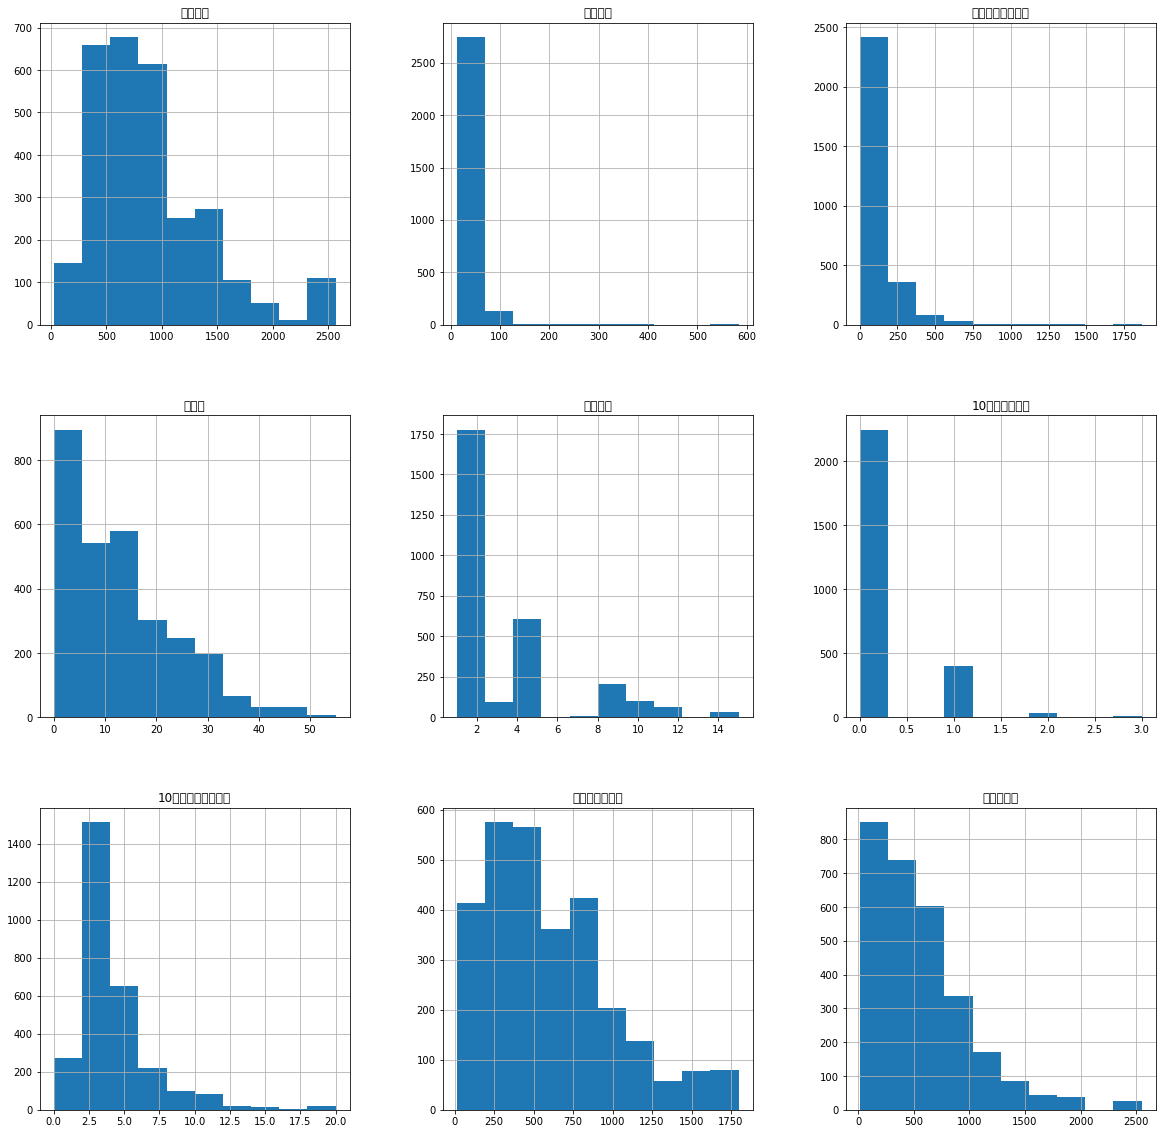

In [65]:
train.hist(figsize = (20,20))